# ch05.03. 기초모델 구현 - 회귀모델 맛보기
---
* 날짜: 2022-05-13
* 이름: 고민수

## 학습내용
    - 회귀 분석의 개념에 대해 이해한다
    - 단순 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 다중 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 모델링에 대한 전체적인 프로세스 과정을 이해한다. 

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
```

In [34]:
import os

<module 'os' from 'C:\\Users\\user\\anaconda3\\envs\\tf\\lib\\os.py'>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 단순 회귀 문제
---




|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 데이터 정의

In [5]:
xx = np.array([3,5,5,7,8])
yy = np.array([20,50,60,90,100])

* 데이터 시각화

In [ ]:

plt.scatter(xx, yy, c="k", label="data")
plt.title("sample space( y according to x)")

### **| step 1. 모델 구현**

$model(x;w) = wx$

* 모델 정의

In [23]:
def model_simple(x, w=1):
    return w*x

* 초기 모델 사용


|공부시간(x)|종합점수(y)| 예측값 ($\hat{y})$|
|------|---|--|
|3|20|3|
|5|50|5|
|5|60|5|
|7|90|7|
|8|100|8|

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [27]:
def propagation(xx, yy, w):
    total_loss = 0
    for x, y in zip(xx, yy):
        y_preds = model_simple(x, w=w) # 예측값 구하기
        loss = np.abs(y_preds-y) # 손실 구하기
        total_loss += loss # 전체 샘플의 손실 구하기
    return total_loss

print("total loss :", propagation(xx,yy, 5))

total loss : 180


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w$를 5부터 20까지 바꿔가며 손실 계산하기


In [30]:
ws = np.arange(5,20)
total_losses = propagation(xx, yy, ws)

Text(0.5, 1.0, 'sample space( y according to x)')

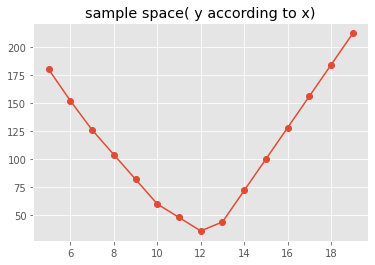

In [31]:
plt.plot(ws,total_losses, marker="o")
plt.title("sample space( y according to x)")

### **| step 4. 예측 (Prediction)**

* 학습 완료된 모델의 최종 손실 계산

In [35]:
w_ = 12
propagation(xx, yy, w_ )

36

* 학습 완료된 모델에 대한 예측 시각화

[ 0  1  2  3  4  5  6  7  8  9 10]


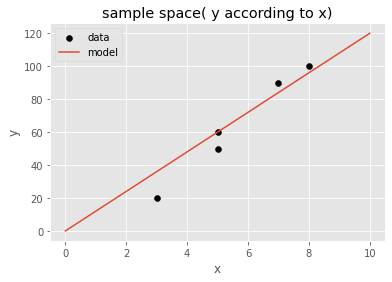

In [40]:
x_every = np.arange(11)
print(x_every)
y_preds = model_simple(x_every, w_)

plt.scatter(xx,yy,c="k", label="data")
plt.plot(x_every, y_preds, label="model")

plt.title("sample space( y according to x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

* 공부시간이 6시간일 때 예상 점수는?


In [43]:
6*w_

72

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 테스트 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|1|5|
|2|15|
|5|55|
|6|80|
|7|85|

* 테스트 데이터셋 정의

In [41]:
x_tests= np.array([1,2,5,6,7])
y_tests= np.array([5,15,55,80,85])
x_tests.shape, y_tests.shape

((5,), (5,))

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산 (평가)

In [42]:
propagation(x_tests, y_tests, w_)

30

* 학습 완료된 모델에 테스트 데이터 예측 시각화

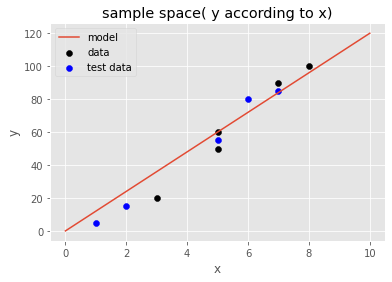

In [45]:
plt.plot(x_every, y_preds, label="model")
plt.scatter(xx,yy,c="k", label="data")
plt.scatter(x_tests, y_tests, c="b", label="test data")

plt.title("sample space( y according to x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 다중 회귀 문제
---



|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|


* 데이터 정의

In [114]:
X[:,0]

array([2, 6, 4, 7, 8])

In [54]:
X = np.array([2,9,6,8,4,7,7,6,8,6]).reshape(5,2)
yy = np.array([20, 50, 60, 90, 100])
X.shape, yy.shape

((5, 2), (5,))

* 데이터 시각화

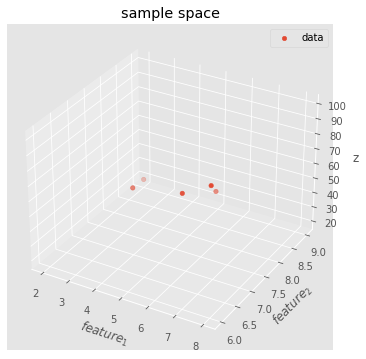

In [57]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection="3d")

x1 = X[:,0]
x2 = X[:, 1]
ax.scatter3D(x1,x2, yy, label="data")

ax.set(title="sample space", xlabel="$feature_1$", ylabel="$feature_2$", zlabel="z")
plt.legend()
plt.show()

### **| step 1. 모델 구현**

$model(\vec{x};\vec{w}) = w_1x_1+w_2x_2$

* 모델 정의

In [58]:
def model_multi (x1, x2 , w1=1, w2=1):
    return w1*x1+w2*x2

* 초기 모델 사용


|공부시간|수면시간|종합점수|예측값 ($\hat{y}$)|
|------|---|--|--|
|2|9|20|19|
|6|8|50|38|
|4|7|60|27|
|7|6|90|41|
|8|6|100|46|

In [59]:
x1s = X[:,0]
x2s = X[:,1]
model_multi(x1s, x2s, w1=5, w2=1)

array([19, 38, 27, 41, 46])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [63]:
def propagation(X, yy, w1, w2):
    total_loss = 0
    for x, y in zip(X, yy):
        y_preds = model_multi(x[0], x[1], w1=w1, w2=w2) # 예측값 구하기
        loss = np.abs(y_preds-y) # 손실 구하기
        total_loss += loss # 전체 샘플의 손실 구하기
    return total_loss

print("total loss :", propagation(X,yy, 1, 1))

total loss : 257


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w_1$를 0부터 30, $w_2$를 -10부터 10까지 바꿔가며 손실 계산하기


In [70]:
w1s = np.arange(0,30)
w2s = np.arange(-10,10)

W1, W2 = np.meshgrid(w1s, w2s)

L = propagation(X, yy, W1, W2)
W1.shape, W2.shape, L.shape

((20, 30), (20, 30), (20, 30))

* 3d플롯으로 시각화

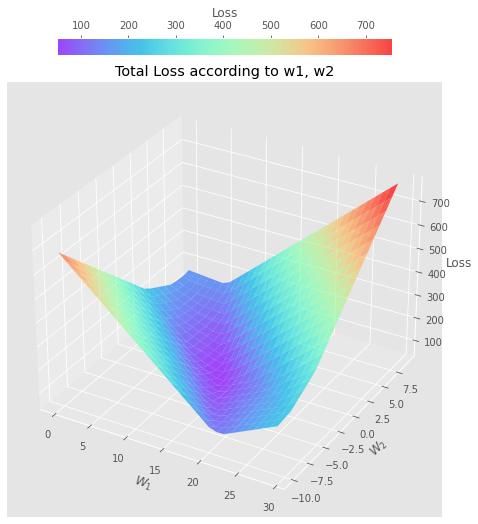

In [98]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")

surf = ax.plot_surface(W1,W2, L, cmap="rainbow", alpha=0.7)

# 컬러바
fig.colorbar(surf,
             label="Loss",
             shrink=0.4,
             location="top",
             aspect=20)



ax.set(title="Total Loss according to w1, w2", xlabel="$W_1$", ylabel="$W_2$", zlabel="Loss")
plt.show()

### **| step 4. 예측 (Prediction)**

* 최적화된 파라미터 정의

In [91]:
L.shape, np.min(L), np.argmin(L)

w1_, w2_ = W1.flatten()[np.argmin(L)],  W2.flatten()[np.argmin(L)]
print(w1_, w2_, np.min(L))

13 -1 45


* 학습 완료된 모델의 최종 손실 계산

In [142]:
propagation(X, yy, w1_, w2_)

45

* 학습 완료된 모델에 대한 예측 시각화

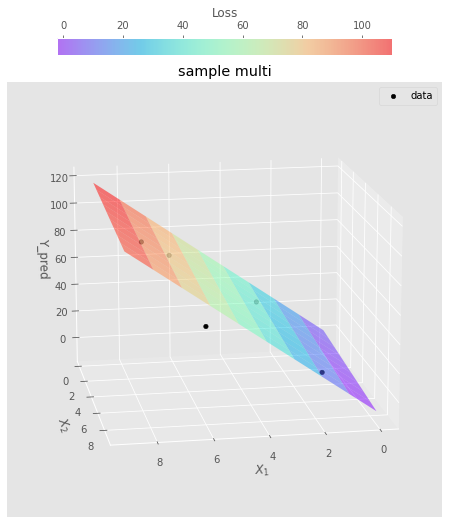

In [123]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")

x1_every = np.arange(10)
x2_every = np.arange(10)

X1_every, X2_every = np.meshgrid(x1_every, x2_every)

Y_pred = model_multi(X1_every, X2_every, w1_, w2_)

surf = ax.plot_surface(X1_every, X2_every, Y_pred, cmap="rainbow", alpha=0.5)
ax.scatter3D(x1,x2, yy, label="data", c="k")

# 컬러바
fig.colorbar(surf,
             label="Loss",
             shrink=0.4,
             location="top",
             aspect=20)

ax.view_init(15, 80)

ax.set(title="sample multi", xlabel="$X_1$", ylabel="$X_2$", zlabel="Y_pred")
plt.legend()
plt.show()

* 공부시간이 6시간이고 수면시간 5시간 일 때 예상 점수는?


In [124]:
model_multi(6, 5, w1_, w2_)

73

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋


|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

* 테스트 데이터셋

|공부시간|수면시간|종합점수|
|------|---|--|
|1|7|15|
|3|8|25|
|5|7|60|
|5|6|90|
|10|7|95|

* 테스트 데이터셋 정의

In [130]:
X_train = np.array([2,9,6,8,4,7,7,6,8,6]).reshape(5,2)
y_train = np.array([20, 50, 60, 90, 100])

X_test = np.array([1,7,3,8,5,7,5,6,10,7]).reshape(5,2)
y_test = np.array([15,25,60,90,95])

for i in [X_train,y_train,X_test,y_test]:
    print(i.shape)

(5, 2)
(5,)
(5, 2)
(5,)


In [131]:
w1s = np.arange(0,100)
w2s = np.arange(-50,50)

W1, W2 = np.meshgrid(w1s, w2s)

L = propagation(X_train, y_train, W1, W2)
W1.shape, W2.shape, L.shape

((100, 100), (100, 100), (100, 100))

In [132]:
L.shape, np.min(L), np.argmin(L)

w1_, w2_ = W1.flatten()[np.argmin(L)],  W2.flatten()[np.argmin(L)]
print(w1_, w2_, np.min(L))

13 -1 45


* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산

In [258]:
y_preds = model_multi(X_test[:,0], X_test[:,1], w1_, w2_)

* 학습 완료된 모델에 테스트 데이터 예측 시각화

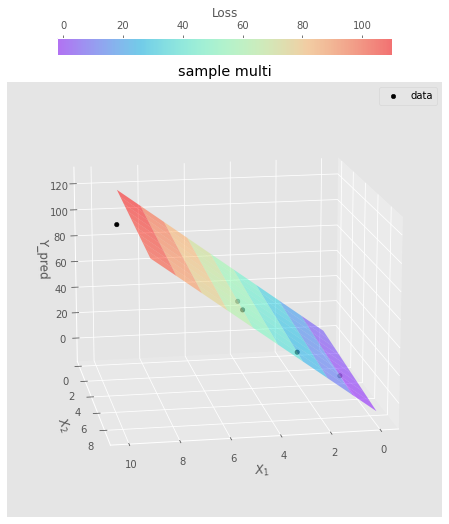

In [144]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")

x1_every = np.arange(10)
x2_every = np.arange(10)

X1_every, X2_every = np.meshgrid(x1_every, x2_every)

Y_pred = model_multi(X1_every, X2_every, w1_, w2_)

# train data, surface
surf = ax.plot_surface(X1_every, X2_every, Y_pred, cmap="rainbow", alpha=0.5)

# 테스트 데이터
ax.scatter3D(X_test[:,0],X_test[:,1], y_preds, label="data", c="k")

# 컬러바
fig.colorbar(surf,
             label="Loss",
             shrink=0.4,
             location="top",
             aspect=20)

ax.view_init(15, 80)

ax.set(title="sample multi", xlabel="$X_1$", ylabel="$X_2$", zlabel="Y_pred")
plt.legend()
plt.show()

## 클래스 작성하기
---

```
단순 선형회귀 분석 클래스를 작성합니다.

model = Model() # 모델 클래스가 생성됩니다.
model.fit(xs, ys) # 최적화가 진행됩니다.
model.predict(xs) # 예측을 진행합니다.
model.validation(xs, ys) # 평가를 진행합니다.
```

In [296]:
class model_bi():
    
    def __init__(self):
        self.w1=1
        self.w2=1
    
    # 예측값 계산기
    def cal_pred (self, x1, x2 , w1=1, w2=1):
        return w1*x1+w2*x2
    
    # 손실값 구하기
    def cal_loss (self, X, yy, w1,w2):
        total_loss = 0
        for idx, (x, y) in enumerate(zip(X, yy)):
            y_preds = self.cal_pred(x[0], x[1], w1=w1, w2=w2) # 예측값 구하기
            loss = np.abs(y_preds-y) # 손실 구하기
            total_loss += loss # 전체 샘플의 손실 구하기
        return total_loss
    
    def fit(self, X, yy):
        
        # 가중치 범위
        w1s = np.arange(0,100)
        w2s = np.arange(-50,50)
        W1, W2 = np.meshgrid(w1s, w2s)
        
        # 최적화
        L = self.cal_loss(X,yy, W1, W2)
        w1_, w2_ = W1.flatten()[np.argmin(L)],  W2.flatten()[np.argmin(L)]
        
        # 최적화 파라미터 저장
        self.w1 = w1_
        self.w2 = w2_
        
    # X_test 에 대한 predict
    def predict(self, X):
        
        return self.cal_pred(X[:,0], X[:,1], w1=self.w1, w2=self.w2)
        
    
    # predict 와 data 의 손실함수를 통한 비교
    def validation(self, yy, yy_preds):
        total_loss = 0
        for y, y_preds in zip(yy, yy_preds):
            loss = np.abs(y_preds-y)
            total_loss += loss
        return total_loss

In [297]:
X_train = np.array([2,9,6,8,4,7,7,6,8,6]).reshape(5,2)
y_train = np.array([20, 50, 60, 90, 100])
X_test = np.array([1,7,3,8,5,7,5,6,10,7]).reshape(5,2)
y_test = np.array([15,25,60,90,95])

model_bi = model_bi()

In [298]:
model_bi.w1

1

In [299]:
model_bi.fit(X_train, y_train)

In [300]:
y_preds = model_bi.predict(X_test)

In [301]:
model_bi.validation(y_test, y_preds)

76